## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Merging all the files which containing sales of different months

In [2]:
all_month = pd.DataFrame()

files = [file for file in os.listdir('C:/Users/Admin/Desktop/sales analysis') if file.endswith('.csv')]

for file in files:
    df = pd.read_csv('C:/Users/Admin/Desktop/sales analysis/'+ file)
    all_month = pd.concat([all_month, df])

In [3]:
all_month.to_csv('all_month.csv',index=False)

### Analysing the merged dataset

In [4]:
df = pd.read_csv("all_month.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560550 entries, 0 to 560549
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          558915 non-null  object
 1   Product           558915 non-null  object
 2   Quantity Ordered  558915 non-null  object
 3   Price Each        558915 non-null  object
 4   Order Date        558915 non-null  object
 5   Purchase Address  558915 non-null  object
dtypes: object(6)
memory usage: 25.7+ MB


### Checking for null values and removing them

In [6]:
df.isna().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

as the number of null values are equal for all the columns it maens that there were many empty rows or blank rows so dropped all the blank columns and cleaned the data set

In [9]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df = df[df['Order Date'].str[0:2] != 'Or']

## Adding Month Column

In [11]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
df['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

Checking if all the months are present as it can be seen all the 12 months are present

### Creating a Column named Sales

In [13]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Creating a Graph to Showcase Monthly Sales Performance

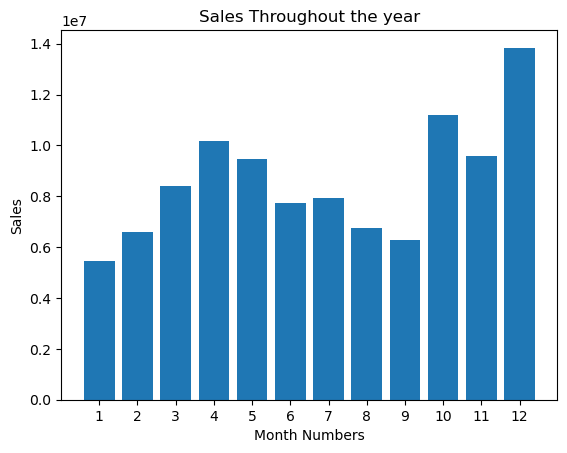

In [15]:
monthly_sales  = df.groupby('Month')['Sales'].sum()
monthly_sales = monthly_sales.reindex(range(1, 13), fill_value=0)

plt.bar(monthly_sales.index,monthly_sales.values)
plt.xticks(monthly_sales.index)
plt.xlabel("Month Numbers")
plt.ylabel("Sales")
plt.title("Sales Throughout the year")
plt.show()

In [16]:
print(monthly_sales)

Month
1      5466770.19
2      6606067.26
3      8421301.14
4     10172010.72
5      9457820.25
6      7733406.78
7      7943327.28
8      6733403.64
9      6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: Sales, dtype: float64


As it can been seen That January has the lowest Sales and December has the heighest number of sales.


Sales Trends by Month
Peak Sales: December has the highest sales with $4,613,443.34. This suggests that December is the most profitable month, potentially due to holiday shopping, promotions, or seasonal demand.
Lowest Sales: January has the lowest sales with $1,822,256.73. This could be due to post-holiday sales drop, reduced consumer spending after the festive season, or other seasonal factors.

### Checking which City had the Heighest sales

extracting city column from the Purchases Addresss 

In [17]:
df['City'] =  df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')')

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [18]:
result = df.groupby('City').sum()['Sales']
result

City
 Atlanta (GA)           8386495.74
 Austin (TX)            5458745.25
 Boston (MA)           10984926.03
 Dallas (TX)            8303926.20
 Los Angeles (CA)      16357712.40
 New York City (NY)    13992952.29
 Portland (ME)          1349274.81
 Portland (OR)          5612197.02
 San Francisco (CA)    24786611.73
 Seattle (WA)           8243266.44
Name: Sales, dtype: float64

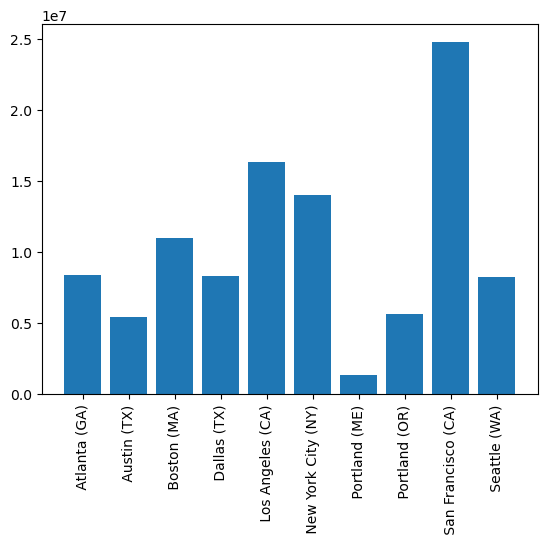

In [19]:

plt.bar(result.index, result.values)
plt.xticks(result.index, rotation= 'vertical')
plt.show()

The sales data reveals that San Francisco leads with $16.5 million in revenue, followed by Los Angeles and New York City with $10.9 million and $9.3 million, respectively, highlighting these as the top-performing cities. Coastal cities dominate, likely due to larger populations and higher purchasing power, while cities like Portland, ME, and Austin, TX, show lower sales figures, indicating regional variations. This information suggests a strong market presence in major metropolitan areas, offering insights for targeted marketing and resource allocation to optimize sales in high-potential regions.

### Lets Check which Product has the heighest sales

In [20]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [21]:
result =  df.groupby("Product").count()['Sales']

In [22]:
print(result)

Product
20in Monitor                  12303
27in 4K Gaming Monitor        18690
27in FHD Monitor              22521
34in Ultrawide Monitor        18543
AA Batteries (4-pack)         61731
AAA Batteries (4-pack)        61923
Apple Airpods Headphones      46647
Bose SoundSport Headphones    39975
Flatscreen TV                 14400
Google Phone                  16575
LG Dryer                       1938
LG Washing Machine             1998
Lightning Charging Cable      64974
Macbook Pro Laptop            14172
ThinkPad Laptop               12384
USB-C Charging Cable          65709
Vareebadd Phone                6195
Wired Headphones              56646
iPhone                        20526
Name: Sales, dtype: int64


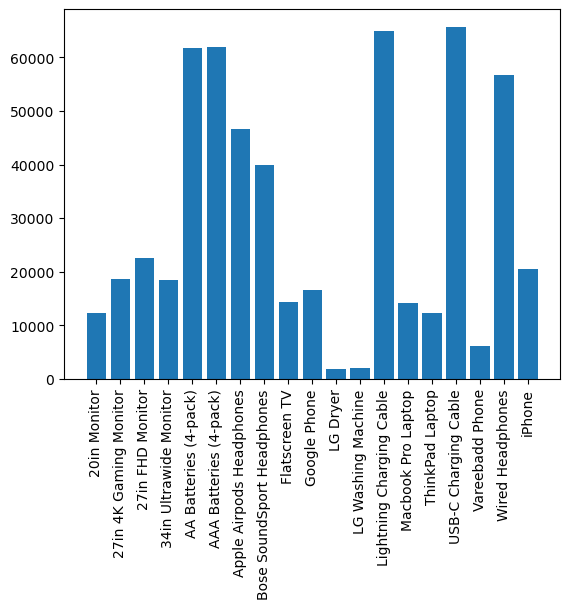

In [23]:
plt.bar(result.index, result.values)
plt.xticks(result.index, rotation= 'vertical')
plt.show()

The data reveals a strong consumer demand for essential tech accessories, with USB-C Charging Cables, Lightning Charging Cables, and AA/AAA Batteries leading in sales, reflecting their frequent use and affordability. High-end audio products like Apple AirPods and Bose SoundSport Headphones also show significant popularity, indicating a growing preference for quality wireless audio. Monitors, particularly the 27in FHD Monitor, are in high demand, likely due to the rise in remote work and gaming. In contrast, larger appliances like the LG Dryer and Washing Machine have much lower sales, suggesting a more niche market for these higher-cost items.